100%|██████████| 9.91M/9.91M [00:00<00:00, 35.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 967kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.13MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.3MB/s]


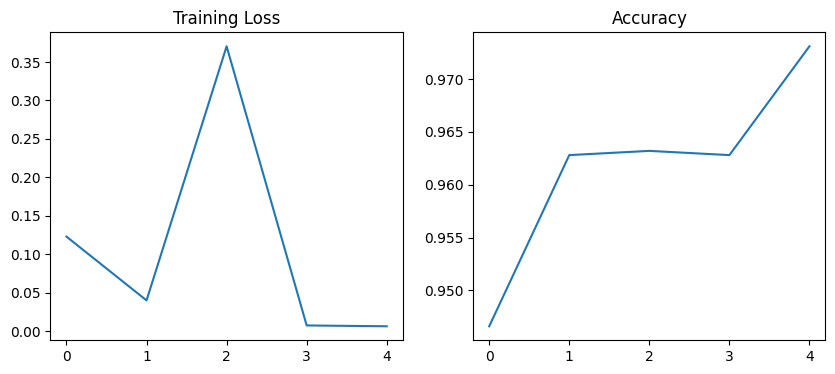

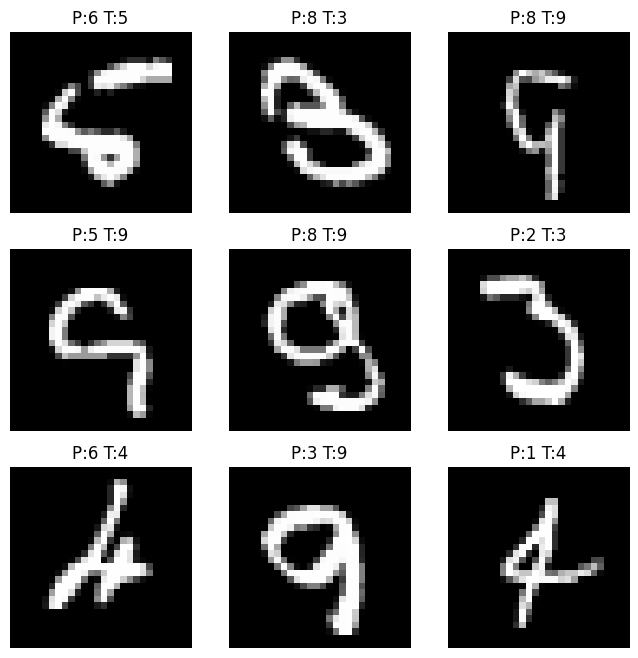

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

t = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train = datasets.MNIST(root='.', train=True, transform=t, download=True)
test = datasets.MNIST(root='.', train=False, transform=t, download=True)

train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
loss_list = []
acc_list = []

for e in range(epochs):
    for x, y in train_loader:
        p = model(x)
        l = loss_fn(p, y)
        opt.zero_grad()
        l.backward()
        opt.step()
    loss_list.append(l.item())

    model.eval()
    c = 0
    n = 0
    with torch.no_grad():
        for x, y in test_loader:
            p = model(x)
            _, pr = torch.max(p, 1)
            c += (pr == y).sum().item()
            n += y.size(0)
    acc_list.append(c/n)
    model.train()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(loss_list)
plt.title("Training Loss")

plt.subplot(1,2,2)
plt.plot(acc_list)
plt.title("Accuracy")

plt.show()

model.eval()
wimg, wpr, wtr = [], [], []

with torch.no_grad():
    for x, y in test_loader:
        p = model(x)
        _, pr = torch.max(p, 1)
        m = pr != y
        if m.sum() > 0:
            for i in range(len(y)):
                if m[i]:
                    wimg.append(x[i])
                    wpr.append(pr[i].item())
                    wtr.append(y[i].item())
                if len(wimg) == 9:
                    break
        if len(wimg) == 9:
            break

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(wimg[i].squeeze(), cmap='gray')
    plt.title(f"P:{wpr[i]} T:{wtr[i]}")
    plt.axis('off')

plt.show()
